In [59]:
%matplotlib notebook
%pylab
%matplotlib inline

import pandas as pd
import glob

Using matplotlib backend: nbAgg
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [60]:
def read_gauge_data(gauge_file):
    """
    Read gauge data from a guage file.
    """
    with open(gauge_file) as f:
        data = f.read().splitlines()
        data1 = []
        for i in range(2,len(data)):
            data[i] = data[i].split()
            data1.append([float(x) for x in data[i]])
            
    data1 = array(data1)
    levels = data1[:,0]
    time = data1[:,1]
    h = data1[:,2]
    hu = data1[:,3]
    hv = data1[:,4]
    eta = data1[:,5]

    eta_max = max(eta)

    return time, eta, eta_max


def read_valid(gauge_file):
    """
    Read gauge data from a literature data.
    """
    with open(gauge_file) as f:
        data = f.read().splitlines()
        data1 = []
        for i in range(1,len(data)):
            data[i] = data[i].split()
            data1.append([float(x) for x in data[i]])
            
    data1 = array(data1)
    guage = data1[:,0]
    z = data1[:,1]
    h_max = data1[:,2]
    eta_max = data1[:,3]

    return h_max, eta_max

In [67]:
# Simulated data

police = []
transformer = []
guages_eta = []
guages_eta_max = []
guages_time = []
for i in range(29):
    if i < 10:
        gauge_file = 'gauge0000' + str(i) + '.txt'
        time, eta, eta_max = read_gauge_data(gauge_file)
        police.append(eta_max)
    elif 10 <= i < 17:
        gauge_file = 'gauge000' + str(i) + '.txt'
        time, eta, eta_max = read_gauge_data(gauge_file)
        police.append(eta_max)
    elif 17 <= i < 20:
        gauge_file = 'gauge000' + str(i) + '.txt'
        time, eta, eta_max = read_gauge_data(gauge_file)
        transformer.append(eta_max)
    else:
        gauge_file = 'gauge000' + str(i) + '.txt'
        time, eta, eta_max = read_gauge_data(gauge_file)
        guages_eta.append(eta)
        guages_eta_max.append(eta_max)
        guages_time.append(time)
     
# Literature data
h_max, geta_max = read_valid('scratch/cadam/topo/scattereddata/gaugemaxima.geoclaw4m')
h_max, feta_max = read_valid('scratch/cadam/topo/scattereddata/gaugemaxima.field.asc')
h_max, teta_max = read_valid('scratch/cadam/topo/scattereddata/gaugemaxima.telemac.asc')
h_max, veta_max = read_valid('scratch/cadam/topo/scattereddata/gaugemaxima.valiani.asc')

geoclaw_maxeta = []; geoclaw_police = []
field_maxeta = []; field_police = []
telemac_maxeta = []; telemac_police = []
valiani_maxeta = []; valiani_police = []
transformer_g = []
transformer_v = []
for i in range(29):
    if i < 17:
        geoclaw_police.append(geta_max[i])
        field_police.append(feta_max[i])
        telemac_police.append(teta_max[i])
        valiani_police.append(veta_max[i])
    elif 17 <= i < 20:
        transformer_g.append(geta_max[i])
        transformer_v.append(veta_max[i])
    else:
        geoclaw_maxeta.append(geta_max[i])
        field_maxeta.append(feta_max[i])
        telemac_maxeta.append(teta_max[i])
        valiani_maxeta.append(veta_max[i])
        

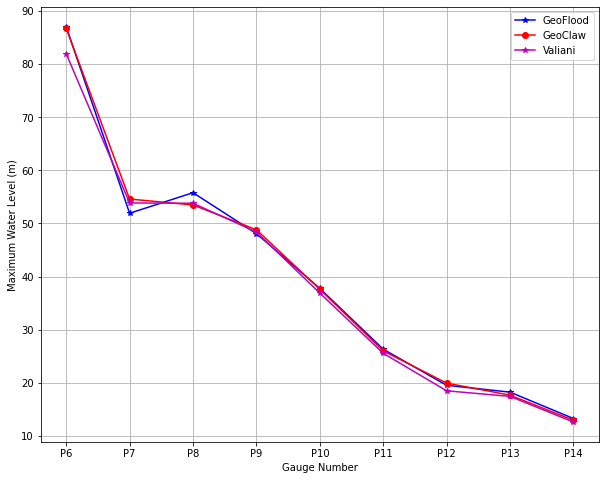

In [76]:
gauge_points = ['P6','P7','P8','P9','P10','P11','P12','P13','P14']

transformer_points = ['A','B', 'C']

# plot the data
figsize(10,8)
figure(1)
plot(guages_eta_max,'b-*',label='GeoFlood')
plot(geoclaw_maxeta,'r-o',label='GeoClaw')
# plot(field_maxeta,'g*',label='Field')
# plot(telemac_maxeta,'c*',label='Telemac')
plot(valiani_maxeta,'m-*',label='Valiani')
# put letters on the x axis
xticks(range(len(guages_eta_max)),gauge_points)

legend(loc='upper right')
ylabel('Maximum Water Level (m)')
xlabel('Gauge Number')
# title('Maximum Water Level at Guages')
grid()
savefig('gauge_maxeta.png')

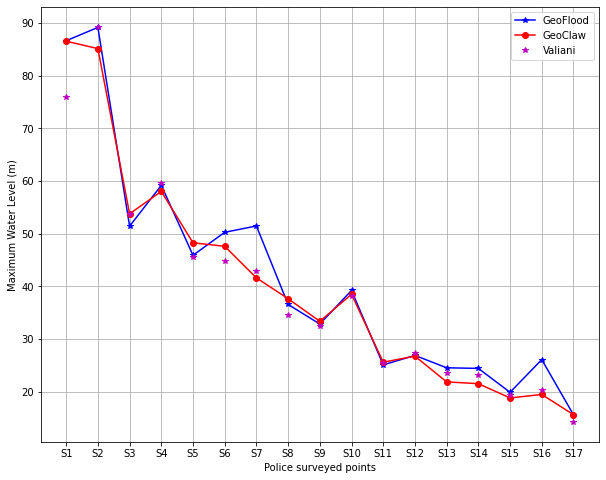

In [77]:
police_points = ['S1','S2','S3','S4','S5','S6','S7','S8','S9','S10','S11','S12','S13','S14','S15','S16','S17']

figure(2)
plot(police,'b-*',label='GeoFlood')
plot(geoclaw_police,'r-o',label='GeoClaw')
# plot(field_police,'g*',label='Field')
# plot(telemac_police,'c*',label='Telemac')
plot(valiani_police,'m*',label='Valiani')
xticks(range(len(police)),police_points)

legend(loc='upper right')
ylabel('Maximum Water Level (m)')
xlabel('Police surveyed points')
# title('Maximum Water Level at Police Stations')
grid()
savefig('police_maxeta.png')

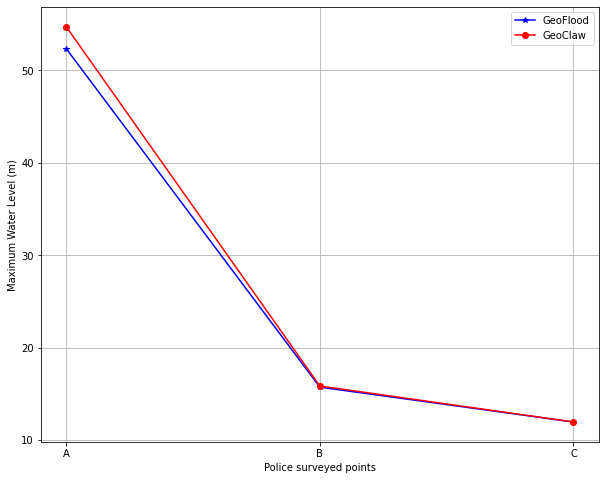

In [75]:
figure(3)
plot(transformer,'b-*',label='GeoFlood')
plot(transformer_g,'r-o',label='GeoClaw')
# plot(field_police,'g*',label='Field')
# plot(telemac_police,'c*',label='Telemac')
# plot(transformer_v,'m*',label='Valiani')
xticks(range(len(transformer_v)),transformer_points)

legend(loc='upper right')
ylabel('Maximum Water Level (m)')
xlabel('Police surveyed points')
# title('Maximum Water Level at Police Stations')
grid()
savefig('transformer_maxeta.png')